(arvore unica para wine, criterio gini) Numero de erros de predicao: 2/30	Taxa de erros: 6.67%


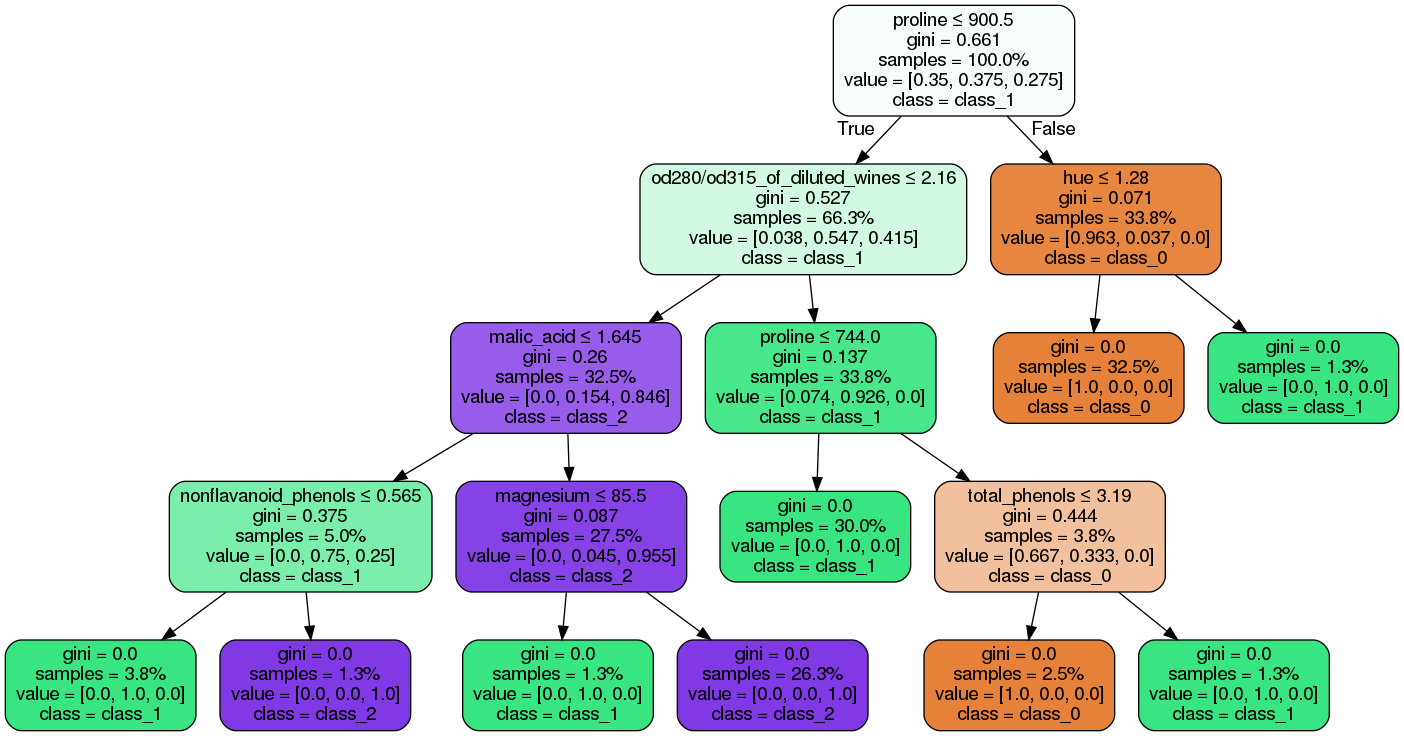

In [11]:
%matplotlib inline
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus
import random
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from scipy import stats
np.random.seed(10)


ninstances_training = 80
ninstances_testing  = 30

#-------------------------------------------------------------------
def carrega_dados_homem_mulher():
    X = [ [180, 15, 0],     
          [177, 42, 0],
          [136, 35, 1],
          [174, 65, 0],
          [141, 28, 1]]
    Y = ['Homem', 'Mulher', 'Mulher', 'Homem', 'Mulher']    
    data_feature_names = [ 'Altura (cm)', 'Tamanho do cabelo (cm)', 'Tom de voz (0=Baixo, 1=Alto)' ]
    class_names = ['Homem', 'Mulher']
    return [X,Y,data_feature_names,class_names]


#-------------------------------------------------------------------
def carrega_dados_wine():
    # indices gerados com seeds 20 e 5, respectivamente
    training_instances = [161, 121, 134, 158, 45, 109, 155, 149, 97, 28, 69, 165, 17, 52, 171, 73, 33, 51, 145, 53, 67, 98, 125, 76, 12, 87, 5, 14, 168, 103, 41, 101, 23, 166, 3, 100, 176, 30, 177, 1, 88, 147, 18, 152, 80, 59, 20, 83, 72, 55, 21, 117, 108, 86, 123, 71, 42, 150, 129, 61, 160, 116, 169, 13, 142, 0, 119, 35, 133, 148, 57, 81, 151, 70, 153, 46, 34, 7, 74, 9]
    testing_instances  = [110, 131, 139, 164, 128, 159, 4, 79, 160, 109, 151, 18, 77, 40, 89, 93, 2, 34, 44, 145, 120, 25, 124, 21, 95, 19, 0, 176, 31, 32]

    dataset = load_wine()
    X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    Y = dataset.target
    data_feature_names = list(X)
    class_names = dataset.target_names

    X_train=X.iloc[training_instances,:]
    Y_train=Y[training_instances]
    X_test=X.iloc[testing_instances,:]
    Y_test=Y[testing_instances]
    
    return [X_train,Y_train,X_test,Y_test,data_feature_names,class_names]
    

    
#-------------------------------------------------------------------
def carrega_dados_cancer(numero_particao):
    particao1 = [[134, 58, 225, 88, 37, 228, 522, 455, 435, 126, 305, 157, 98, 60, 121, 527, 471, 458, 110, 176, 356, 416, 486, 500, 49, 344, 382, 287, 101, 269, 50, 531, 492, 311, 170, 517, 325, 502, 482, 289, 235, 340, 245, 91, 173, 462, 24, 26, 159, 304, 268, 195, 567, 111, 234, 115, 359, 202, 425, 182, 317, 514, 57, 35, 130, 350, 135, 188, 261, 396, 509, 543, 418, 546, 10, 164, 549, 441, 233, 536],
                 [184, 85, 370, 41, 304, 208, 33, 288, 21, 246, 39, 51, 241, 470, 70, 127, 357, 539, 328, 225, 555, 26, 488, 164, 82, 67, 175, 464, 102, 330]]
    particao2 = [[451, 467, 275, 148, 0, 377, 267, 432, 212, 438, 155, 456, 415, 235, 306, 388, 109, 315, 458, 151, 457, 390, 480, 190, 52, 455, 253, 53, 112, 361, 165, 541, 334, 114, 372, 205, 530, 517, 292, 366, 397, 555, 16, 342, 173, 335, 51, 500, 298, 66, 177, 111, 78, 119, 492, 7, 442, 9, 189, 514, 352, 174, 214, 221, 72, 568, 30, 240, 424, 226, 558, 139, 557, 507, 381, 506, 254, 472, 452, 293],
                 [184, 85, 370, 41, 304, 208, 33, 288, 21, 246, 39, 51, 241, 470, 70, 127, 357, 539, 328, 225, 555, 26, 488, 164, 82, 67, 175, 464, 102, 330]]
    particao3 = [[184, 85, 370, 41, 304, 208, 33, 288, 21, 246, 39, 51, 241, 470, 70, 127, 357, 539, 328, 225, 555, 26, 488, 164, 82, 67, 175, 464, 102, 330, 363, 211, 311, 35, 117, 387, 243, 178, 333, 257, 170, 452, 397, 138, 326, 298, 497, 415, 163, 557, 237, 430, 86, 278, 22, 380, 435, 498, 395, 338, 329, 259, 477, 537, 269, 377, 34, 399, 368, 565, 467, 161, 219, 12, 262, 95, 66, 437, 73, 140],
                 [184, 85, 370, 41, 304, 208, 33, 288, 21, 246, 39, 51, 241, 470, 70, 127, 357, 539, 328, 225, 555, 26, 488, 164, 82, 67, 175, 464, 102, 330]]
    
    if (numero_particao==1):
        [selected_instances_training, selected_instances_testing] = particao1
    elif (numero_particao==2):
        [selected_instances_training, selected_instances_testing] = particao2
    elif (numero_particao==3):
        [selected_instances_training, selected_instances_testing] = particao3

    dataset = load_breast_cancer()
    X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    Y = dataset.target
    data_feature_names = list(X)
    class_names = dataset.target_names
    
    X_train=X.iloc[selected_instances_training,:]
    Y_train=Y[selected_instances_training]
    X_test=X.iloc[selected_instances_testing,:]
    Y_test=Y[selected_instances_testing]
    
    return [X_train,Y_train,X_test,Y_test,data_feature_names,class_names]


#-------------------------------------------------------------------
def aprende_arvore_unica_cancer(subconjunto_de_dados, exibe_arvore):
    [X_train, Y_train, X_test, Y_test, data_feature_names, class_names] = carrega_dados_cancer(subconjunto_de_dados)

    classificador_arvore = DecisionTreeClassifier(criterion='entropy', random_state=10)
    classificador_arvore.fit(X_train,Y_train)

    predicoes       = classificador_arvore.predict(X_test)
    numero_de_erros = sum(abs(Y_test - predicoes))
    taxa_de_erros   = 100.0*numero_de_erros/ninstances_testing
    print "(arvore unica #%d para dataset de cancer) Numero de erros de predicao: %d/%d\tTaxa de erros: %.2f%%" % (subconjunto_de_dados, numero_de_erros, ninstances_testing, taxa_de_erros)

    if exibe_arvore:
        dot_data = StringIO()
        export_graphviz(classificador_arvore, out_file=dot_data,  
                        filled=True, rounded=True, feature_names=data_feature_names, class_names = class_names,
                        special_characters=True, proportion=True)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        display(Image(graph.create_png()))

    return [predicoes]



#-------------------------------------------------------------------
# Parametros ajustaveis:

cria_floresta = False  # se False, treina com uma arvore unica; se True, faz votacao entre 3 arvores
# dataset = 'HomemMulher'
dataset = 'Wine'
# dataset = 'Cancer'
subconjunto_de_dados_cancer = 2
# criterio_escolha_atributo = 'entropy'  # Algoritmo ID3
criterio_escolha_atributo = 'gini'     # Algoritmo CART


#-------------------------------------------------------------------

if dataset == 'Cancer':
    if not cria_floresta:  # cria uma arvore unica
        aprende_arvore_unica_cancer(subconjunto_de_dados_cancer, True)
    else: # cria um ensemble de 3 arvores
        predicoes=np.zeros((3,ninstances_testing))
        for subconjunto_de_dados in [1,2,3]:
            tmp = aprende_arvore_unica_cancer(subconjunto_de_dados, False)
            predicoes[subconjunto_de_dados-1,:] = tmp[0]
        voto_majoritario = stats.mode(predicoes)
        voto_majoritario = voto_majoritario[0][0]

        [_, _, _, Y_test, _, _] = carrega_dados_cancer(1)
        numero_de_erros = sum(abs(Y_test - voto_majoritario))
        taxa_de_erros   = 100.0*numero_de_erros/ninstances_testing
        print "(voto majoritario para dataset de cancer) Numero de erros de predicao: %d/%d\tTaxa de erros: %.2f%%" % (numero_de_erros, ninstances_testing, taxa_de_erros)

        
elif dataset == 'HomemMulher':
    [X,Y,data_feature_names,class_names] = carrega_dados_homem_mulher()
    
    classificador_arvore = DecisionTreeClassifier(criterion='entropy', random_state=10)
    classificador_arvore.fit(X,Y)

    dot_data = StringIO()
    export_graphviz(classificador_arvore, out_file=dot_data,  
                    filled=True, rounded=True, feature_names=data_feature_names, class_names = class_names,
                    special_characters=True, proportion=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

elif dataset == 'Wine':
    [X_train,Y_train,X_test,Y_test,data_feature_names,class_names] = carrega_dados_wine()

    classificador_arvore = DecisionTreeClassifier(criterion=criterio_escolha_atributo)
    classificador_arvore.fit(X_train, Y_train)
    
    predicoes       = classificador_arvore.predict(X_test)
    numero_de_erros = sum(abs(Y_test - predicoes))
    taxa_de_erros   = 100.0*numero_de_erros/ninstances_testing
    print "(arvore unica para wine, criterio %s) Numero de erros de predicao: %d/%d\tTaxa de erros: %.2f%%" % \
        (criterio_escolha_atributo, numero_de_erros, ninstances_testing, taxa_de_erros)    
    dot_data = StringIO()
    export_graphviz(classificador_arvore, out_file=dot_data,  
                    filled=True, rounded=True, feature_names=data_feature_names, class_names = class_names,
                    special_characters=True, proportion=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

